# Task-2 (Support_Ticket_Classifiaction)

In [15]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_support_tickets.csv')
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [16]:
# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\{.*?\}', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join(text.split())
    return text

df['cleaned_description'] = df['Ticket Description'].apply(clean_text)


In [17]:
# Feature Extraction
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['cleaned_description'])

y_category = df['Ticket Type']
y_priority = df['Ticket Priority']

# Model Training & Evaluation
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_category, test_size=0.2, random_state=42)

category_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
category_model.fit(X_train_c, y_train_c)
y_pred_c = category_model.predict(X_test_c)

print("--- Ticket Category Classification Report ---")
print(classification_report(y_test_c, y_pred_c))

--- Ticket Category Classification Report ---
                      precision    recall  f1-score   support

     Billing inquiry       0.18      0.14      0.16       357
Cancellation request       0.19      0.19      0.19       327
     Product inquiry       0.21      0.19      0.20       316
      Refund request       0.23      0.28      0.26       345
     Technical issue       0.23      0.24      0.24       349

            accuracy                           0.21      1694
           macro avg       0.21      0.21      0.21      1694
        weighted avg       0.21      0.21      0.21      1694




--- Priority Prediction Classification Report ---
              precision    recall  f1-score   support

    Critical       0.22      0.26      0.24       411
        High       0.26      0.27      0.26       409
         Low       0.21      0.19      0.20       415
      Medium       0.25      0.23      0.24       459

    accuracy                           0.24      1694
   macro avg       0.23      0.24      0.23      1694
weighted avg       0.24      0.24      0.23      1694



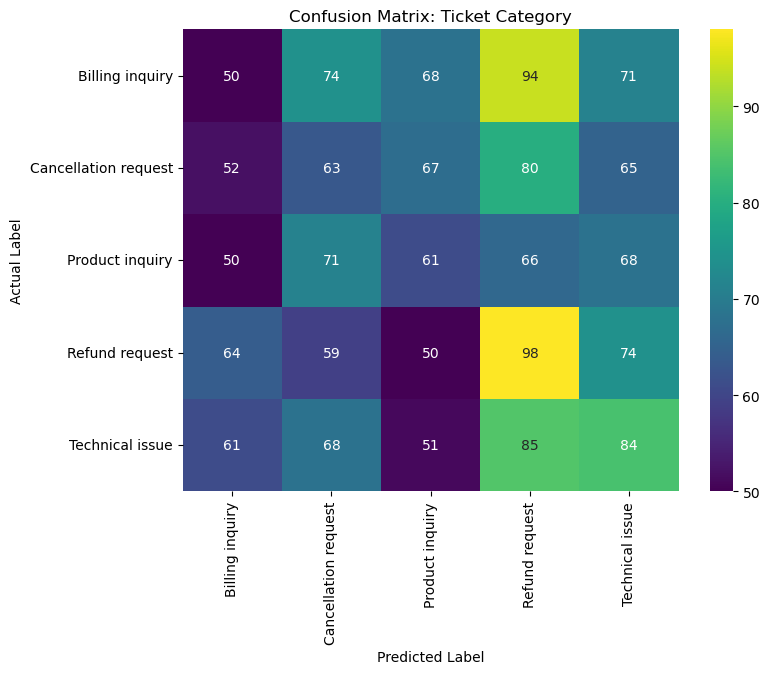

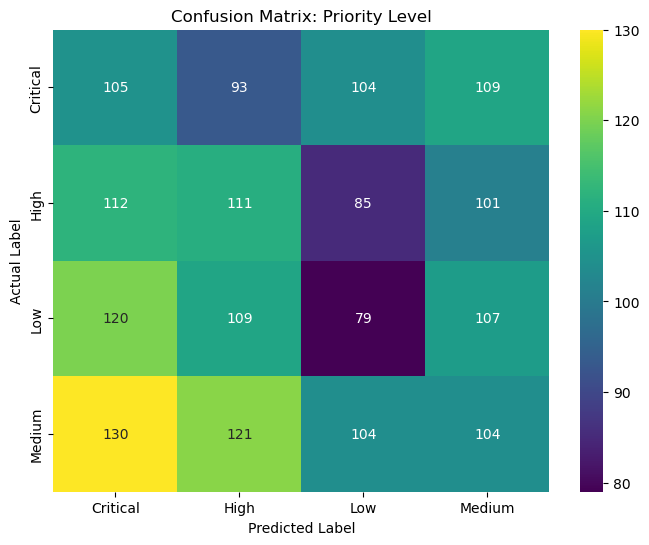

In [18]:

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_priority, test_size=0.2, random_state=42)

priority_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
priority_model.fit(X_train_p, y_train_p)
y_pred_p = priority_model.predict(X_test_p)

print("\n--- Priority Prediction Classification Report ---")
print(classification_report(y_test_p, y_pred_p))

# Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
                xticklabels=sorted(y_true.unique()), 
                yticklabels=sorted(y_true.unique()))
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Visualize results
plot_confusion_matrix(y_test_c, y_pred_c, "Confusion Matrix: Ticket Category")
plot_confusion_matrix(y_test_p, y_pred_p, "Confusion Matrix: Priority Level")